In [16]:
import os
import glob
import cmocean
import numpy as np
import datetime
import matplotlib.pyplot as plt
from GPX2dist_angle_histogram import get_coords
from mpl_toolkits.basemap import Basemap

In [9]:
today = datetime.datetime.today().strftime('%Y-%m-%d')
today

'2019-11-20'

In [2]:
datadirlist = ["/data/GPX/Belgique/2019/SartTilman/",
               "/data/GPX/Belgique/2018/SartTilman/",
               "/data/GPX/Belgique/2017/sarttilman/"]

In [3]:
def get_coords_from_dir(datadir):
    lonv, latv, elev = [], [], []
    datafilelist = glob.glob(os.path.join(datadir, "*.gpx"))
    for datafile in datafilelist:
        lon, lat, ele = get_coords(datafile)
        lonv.extend(lon)
        latv.extend(lat)
        elev.extend(ele)
    
    # Convert to numpy arrays
    lonv = np.array(lonv)
    latv = np.array(latv)
    elev = np.array(elev)
    
    return lonv, latv, elev

In [14]:
def scatter_elev(lon, lat, ele, year=None, NN=100, figname=None):
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(lon[::NN], lat[::NN], s=1, c=np.array(ele[::NN]), cmap=cmocean.cm.deep_r,
                vmin=70., vmax=260.)
    cb = plt.colorbar(extend="both")
    cb.set_label("m", rotation=0, ha="left")
    if year is not None:
        plt.title(year, fontsize=16)
    plt.xlim(5.52, 5.62)
    plt.ylim(50.54, 50.63)
    if figname is not None:
        plt.savefig(figname, dpi=300, bbox_inches="tight")
    plt.close()

In [ ]:
lonall = np.array([])
latall = np.array([])
eleall = np.array([])

for datadir in datadirlist:
    
    year = datadir.split("/")[-3]
    
    # Read the coordinates from all the files
    lon, lat, ele = get_coords_from_dir(datadir)
    
    # Add to global vector
    lonall = np.append(lonall, lon)
    latall = np.append(latall, lat)
    eleall = np.append(eleall, ele)
    
    # Make a plot
    figname = "../images/sarttilman_elevation_{}".format(year)
    #scatter_elev(lon, lat, ele, year, NN=1, figname=figname)
    
    # Write into a text file
    with open("./sartilman_elevation_{}.dat".format(year), "w") as f:
        for i in range(0, len(lon)):
            f.writelines("{} {} {}\n".format(lon[i], lat[i], ele[i]))

### Make the plot with all the data

In [15]:
figname = "../images/sarttilman_elevation_{}".format(today)
scatter_elev(lonall, latall, eleall, year=None, NN=1, figname=figname)

### Transparent map to be overlay in leaflet

In [21]:
m = Basemap(llcrnrlon=5.52, llcrnrlat=50.54,
            urcrnrlon=5.62, urcrnrlat=50.64,
            resolution = 'i', epsg=3857)

In [26]:
fig = plt.figure(figsize=(7, 7))
ax = plt.subplot(111)
sca = m.scatter(lonall, latall, s=3, c=eleall, latlon=True, 
                vmin=70., vmax=260.)
ax.axis('off')
figname = "../images/sarttilman_elevation_leaflet_{}".format(today)
plt.savefig(figname, transparent=True, dpi=300,
    bbox_inches='tight', pad_inches=0)
plt.close()

In [23]:
# Write into a text file
with open("./sartilman_elevation_all.dat", "w") as f:
    for i in range(0, len(lon)):
        f.writelines("{} {} {}\n".format(lonall[i], latall[i], eleall[i]))

## Create the contour file

In [24]:
lonmin = lonall.min()
lonmax = lonall.max()
latmin = latall.min()
latmax = latall.max()
elemin = eleall.min()
elemax = eleall.max()

In [25]:
with open("../diva/coast.cont", "w") as f:
    f.writelines("1\n")
    f.writelines("4\n")
    f.writelines("{} {}\n".format(lonmin, latmin))
    f.writelines("{} {}\n".format(lonmax, latmin))
    f.writelines("{} {}\n".format(lonmax, latmax))
    f.writelines("{} {}\n".format(lonmin, latmax))

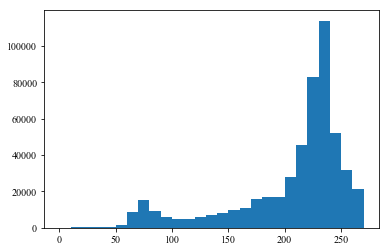

In [26]:
plt.hist(eleall, bins=np.arange(0., 280., 10.))
plt.show()
plt.close()